In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import warnings
import nltk
from nltk.util import pr
from nltk.corpus import stopwords

In [2]:
warnings.filterwarnings('ignore')
stemmer = nltk.SnowballStemmer('english')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/vysakh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('war_tweets_data.csv')

In [4]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [5]:
data.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
10009,1630331110415646721,1630305860298633216,2023-02-27 22:16:41 UTC,2023-02-27,22:16:41,0,998476071292035072,ahk14061,Andre🇳🇴🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'wallacemick', 'name': 'Mick ...",NaN,NaN,NaN,NaN
10010,1630331106305122304,1630202100369043459,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1477276764908965889,marxistswon,Marxists Won,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'tom_username_', 'name': 'Tom...",NaN,NaN,NaN,NaN
10011,1630331106296844288,1630301689818275840,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1616822734214037504,johngerver21,John Gerver,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN
10012,1630331102480171009,1630181795101540357,2023-02-27 22:16:39 UTC,2023-02-27,22:16:39,0,25588052,late49er,Ben Davis,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RonFilipkowski', 'name': 'Ro...",NaN,NaN,NaN,NaN
10013,1630331101817233414,1630248150954049537,2023-02-27 22:16:39 UTC,2023-02-27,22:16:39,0,1500491804176797700,dillengody,Gody van Dillen 🇺🇦 🇳🇱,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Lyla_lilas', 'name': 'Oriann...",NaN,NaN,NaN,NaN


In [6]:
data.shape

(10014, 36)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10014 non-null  int64  
 1   conversation_id  10014 non-null  int64  
 2   created_at       10014 non-null  object 
 3   date             10014 non-null  object 
 4   time             10014 non-null  object 
 5   timezone         10014 non-null  int64  
 6   user_id          10014 non-null  int64  
 7   username         10014 non-null  object 
 8   name             10014 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10014 non-null  object 
 11  language         10014 non-null  object 
 12  mentions         10014 non-null  object 
 13  urls             10014 non-null  object 
 14  photos           10014 non-null  object 
 15  replies_count    10014 non-null  int64  
 16  retweets_count   10014 non-null  int64  
 17  likes_count 

In [8]:
data.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.001400e+04,1.001400e+04,10014.0,1.001400e+04,10014.000000,10014.000000,10014.000000,10014.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.630348e+18,1.629356e+18,0.0,8.634429e+17,0.405432,0.499201,2.399041,0.108548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.007272e+13,1.450302e+16,0.0,6.762363e+17,2.764969,7.684152,30.217589,0.311087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.630331e+18,9.012334e+17,0.0,5.852300e+04,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.630339e+18,1.630187e+18,0.0,1.463392e+09,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.630347e+18,1.630306e+18,0.0,1.146196e+18,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.630356e+18,1.630342e+18,0.0,1.498023e+18,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.630366e+18,1.630366e+18,0.0,1.630339e+18,225.000000,579.000000,1524.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10011
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9235
video                  0
thumbnail           8927
near               10014
geo                10014
source             10014
user_rt_id         10014
user_rt            10014
retweet_id         10014
reply_to               0
retweet_date       10014
translate          10014
trans_src          10014
trans_dest         10014
dtype: int64

In [10]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [11]:
data[['tweet']].head()

,tweet
0,@nazijaeger__ @derwener @Anonymous9775 Russia ...
1,The Russia HAARP which could destroy USA in on...
2,Putin gives Steven Seagal Russia&amp;#8217;s O...
3,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...
4,@Pottingpinks @mfa_russia @mod_russia @mil_his...


In [12]:
data['language'].value_counts()

en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: language, dtype: int64

Text(0.5, 1.0, 'Most Used Language In Tweets')

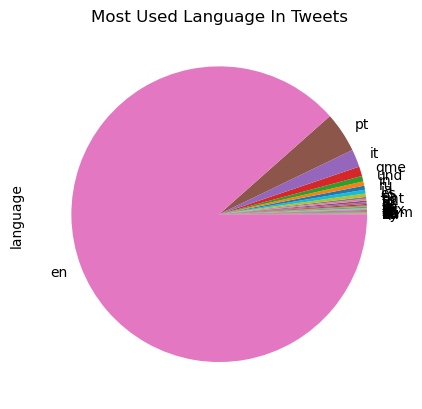

In [13]:
data.language.value_counts().sort_values().plot(kind = 'pie')
plt.title('Most Used Language In Tweets')

In [14]:
data['tweet'][0]

'@nazijaeger__ @derwener @Anonymous9775 Russia is a place where Satan rules well'

In [15]:
import seaborn as sns

def extract_hashtags(tweets_list):
    hashtags = []
    # loop over the words in the tweets
    for tweets in tweets_list:
        ht = re.findall(r"#(\w+)", tweets)
        hashtags.append(ht)
    return hashtags

def extract_frequent_hashtags(hashtags):
    # flattening the list of lists into a single list
    hashtags = sum(hashtags, [])
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                     'Count': list(a.values())})
    # selecting top 25 most frequent hashtags
    d = d.nlargest(columns = "Count", n = 25)
    plt.figure(figsize = (16,7))
    plt.title('Top 25 Most Frequent Hashtags')
    ax = sns.barplot(data= d, x= "Hashtag", y= "Count")
    plt.xticks(rotation = 80)
    ax.set(ylabel = 'Count')
    plt.show()


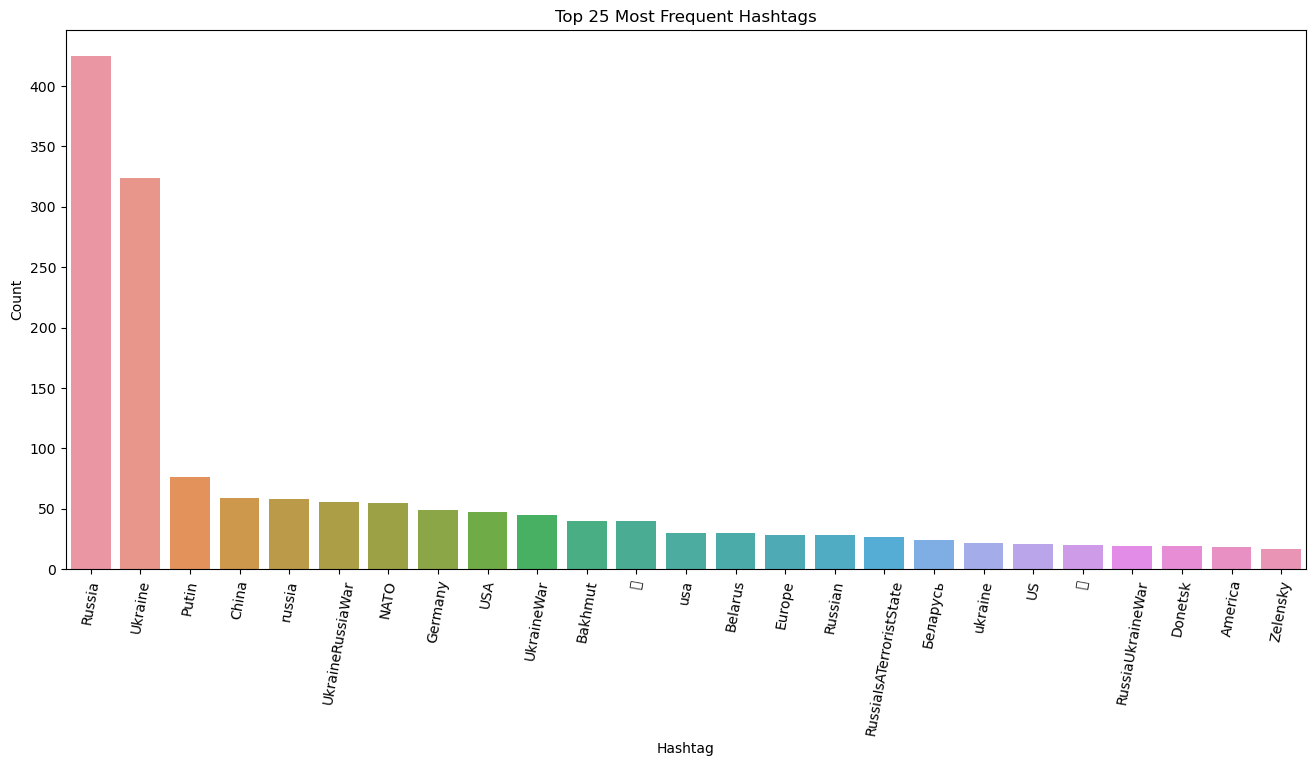

In [16]:
hashtags = extract_hashtags(data['tweet'])
extract_frequent_hashtags(hashtags)

In [17]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
char_count = 0
for tweet in data['tweet']:
    char_count += 1
print(char_count)
average_length = total_length_characters / char_count
print(average_length)

0         79
1        117
2         89
3         71
4        283
        ... 
10009    153
10010    260
10011    145
10012     55
10013     99
Name: total_length_characters, Length: 10014, dtype: int64
1900945
10014
189.82873976432992


In [18]:
data['total_length_words'] = data['tweet'].str.split().str.len()
print(data['total_length_words'])
total_words = data['total_length_words'].sum()
print(total_words)
words_count = 0
for tweet in data['tweet']:
    words_count += 1
print(words_count)
average_words = total_words / words_count
print(average_words)

0        11
1        18
2         9
3         9
4        43
         ..
10009    22
10010    40
10011    25
10012     7
10013    16
Name: total_length_words, Length: 10014, dtype: int64
293116
10014
29.270621130417414


In [19]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['tweet'] = data['tweet'].apply(clean)

In [20]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
char_count = 0
for tweet in data["tweet"]:
    char_count = char_count + 1
print(char_count)
average_length = total_length_characters / char_count
print (average_length)

0         45
1         67
2         44
3         44
4        195
        ... 
10009     78
10010    136
10011     84
10012     45
10013     64
Name: total_length_characters, Length: 10014, dtype: int64
1196769
10014
119.5095865787897


In [21]:
data['total_length_words'] = data['tweet'].str.split().str.len()
print(data['total_length_words'])
total_words = data['total_length_words'].sum()
print(total_words)
word_count = 0
for tweet in data['tweet']:
    word_count = word_count + 1
print(word_count)
average_words = total_words / word_count
print (average_words)

0         7
1        12
2         6
3         6
4        27
         ..
10009    11
10010    20
10011    14
10012     6
10013     8
Name: total_length_words, Length: 10014, dtype: int64
177182
10014
17.69342919912123


In [22]:
from textblob import TextBlob

In [23]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [24]:
data['Sentiment'] = data['tweet'].apply(lambda x:analyze_sentiment(x))
data['Source'] = 'random_user'
data['Length'] = data['tweet'].apply(len)
data['Word_counts'] = data['tweet'].apply(lambda x:len(str(x).split()))

In [25]:
new_data=data[['tweet','retweets_count', 'Sentiment', 'Source', 'Length','Word_counts']]
new_data.head()

,tweet,retweets_count,Sentiment,Source,Length,Word_counts
0,nazijaeg derwen russia place satan rule well,0,0,random_user,45,7
1,russia haarp could destroy usa one fell swoop ...,0,-1,random_user,67,12
2,putin give steven seagal order friendship,0,0,random_user,44,6
3,mainelif baddcompani it alway project russia,0,0,random_user,44,6
4,pottingpink mfarussia modrussia milhistrf muze...,0,-1,random_user,195,27


In [26]:
new_data['Clean tweet'] = new_data['tweet'].apply(lambda x:clean(x))

In [27]:
new_data[["Clean tweet","Sentiment"]].iloc[100]

Clean tweet    kakakakaka gostei da proposta da russia  
Sentiment                                              0
Name: 100, dtype: object

In [28]:
sentiment = new_data['Sentiment'].value_counts()
sentiment

 0    4804
 1    3079
-1    2131
Name: Sentiment, dtype: int64

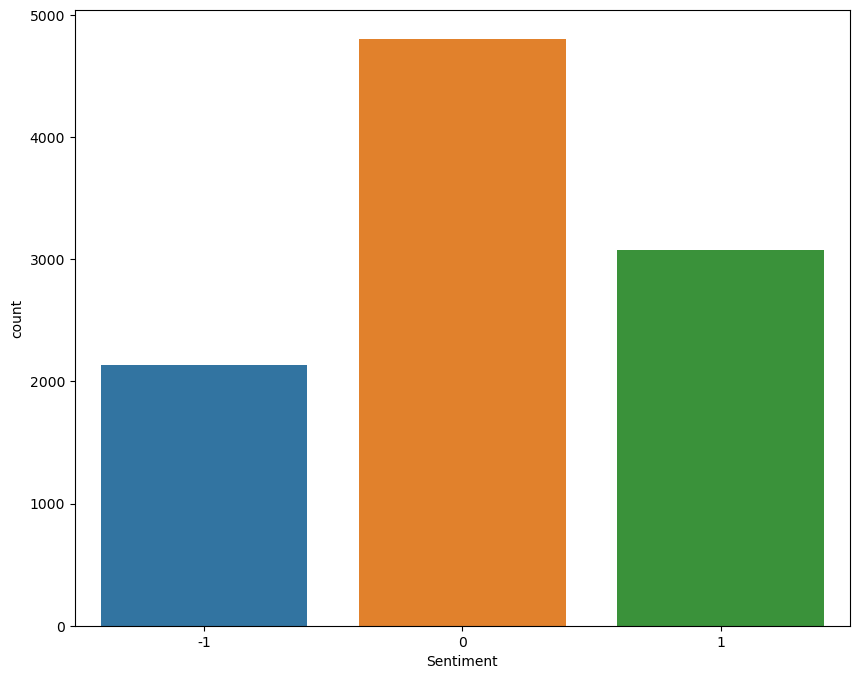

In [29]:
plt.figure(figsize = (10,8))
sns.countplot(data = new_data, x = 'Sentiment')
plt.show()

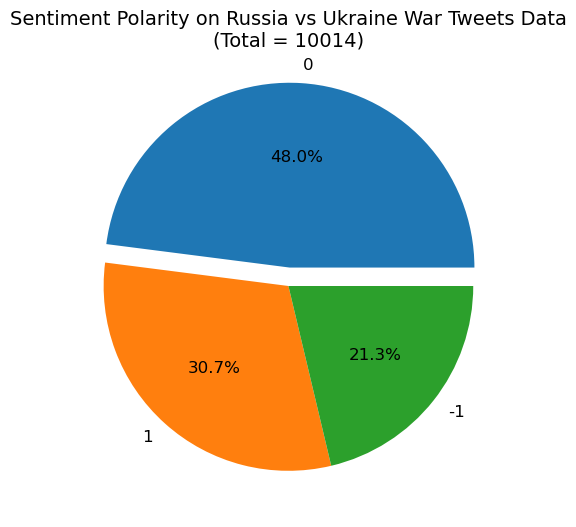

In [30]:
fig, ax = plt.subplots(figsize = (6, 6))
tweets_count = new_data[new_data.columns[0]].count()
sizes = [count for count in new_data['Sentiment'].value_counts()]
labels = list(data['Sentiment'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 12})
ax.set_title(f"Sentiment Polarity on Russia vs Ukraine War Tweets Data\n(Total = {tweets_count})", fontsize=14)
plt.show()

In [31]:
neutral = new_data[new_data['Sentiment'] == 0]
positive = new_data[new_data['Sentiment'] == 1]
negative = new_data[new_data['Sentiment'] == -1]

In [32]:
negative.iloc[1]

tweet             pottingpink mfarussia modrussia milhistrf muze...
retweets_count                                                    0
Sentiment                                                        -1
Source                                                  random_user
Length                                                          195
Word_counts                                                      27
Clean tweet       pottingpink mfarussia modrussia milhistrf muze...
Name: 4, dtype: object

In [33]:
#neutral tweet
print("Neutral tweet example :",neutral['tweet'].values[2])
# Positive tweet
print("Positive Tweet example :",positive['tweet'].values[5])
#negative tweet
print("Negative Tweet example :",negative['tweet'].values[5])

Neutral tweet example : mainelif baddcompani it alway project russia
Positive Tweet example :  complic thing  limit support  eu shouldn't buy russian energi give far support  happen russia win  think russia win china iran embolden expand also
Negative Tweet example : claredalymep peac expens surrend alli isnt peac putin keep violent expand russia border except million ukrainian alreadi dead


In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


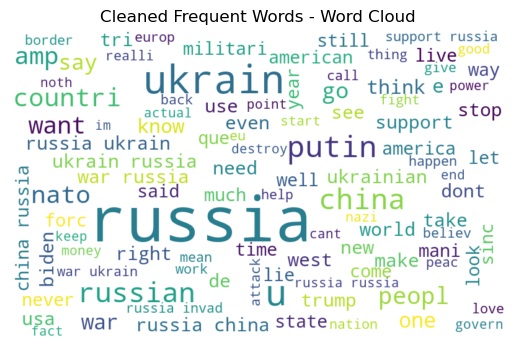

In [35]:
from wordcloud import WordCloud

joined_text = ' '.join(text for text in new_data['Clean tweet'])
wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(joined_text)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Cleaned Frequent Words - Word Cloud')
plt.show()

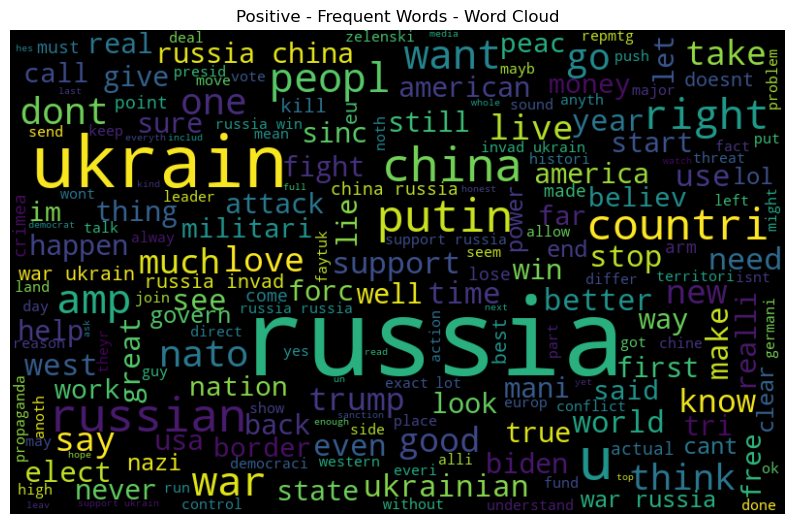

In [36]:
positive_words =' '.join([text for text in new_data['Clean tweet'][new_data['Sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive - Frequent Words - Word Cloud')
plt.show()

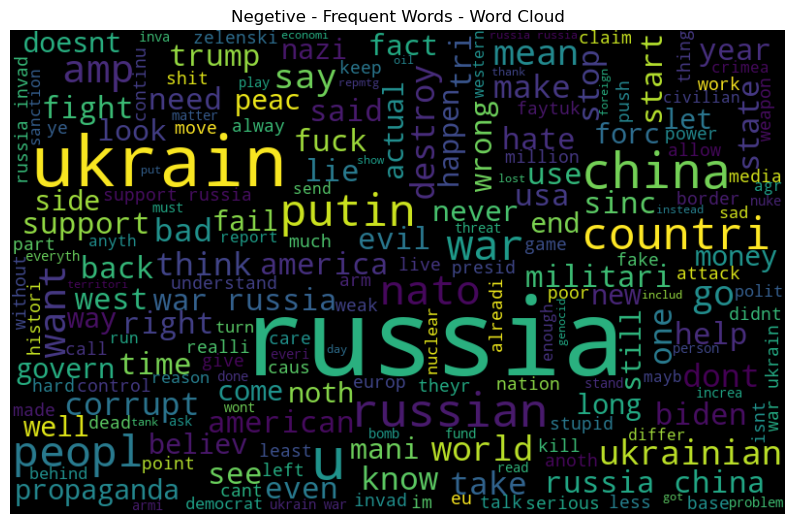

In [37]:
negative_words =' '.join([text for text in new_data['Clean tweet'][new_data['Sentiment'] == -1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Negetive - Frequent Words - Word Cloud')
plt.show()

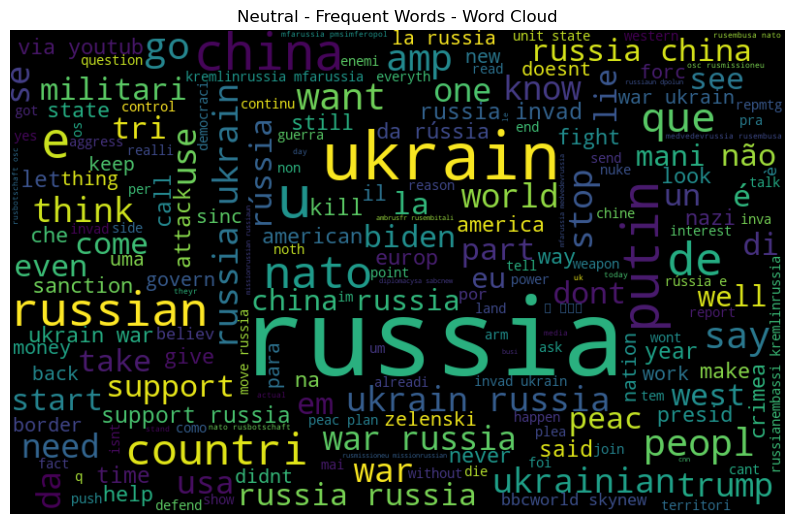

In [38]:
neutral_words =' '.join([text for text in new_data['Clean tweet'][new_data['Sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Neutral - Frequent Words - Word Cloud')
plt.show()